In [1117]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,  FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1118]:
from google.colab import files

uploaded = files.upload()

Saving anomaly_detection.csv to anomaly_detection (6).csv


In [1121]:
df = pd.read_csv('anomaly_detection.csv')

Distribution of Data Points



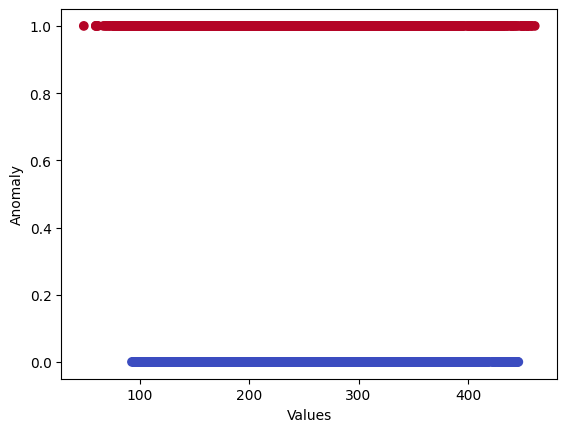

In [1122]:
plt.scatter(df['value'], df['anomaly'], c = df['anomaly'], cmap = 'coolwarm', marker="o")
plt.xlabel("Values")
plt.ylabel("Anomaly")
plt.show()

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'anomaly'}>]], dtype=object)

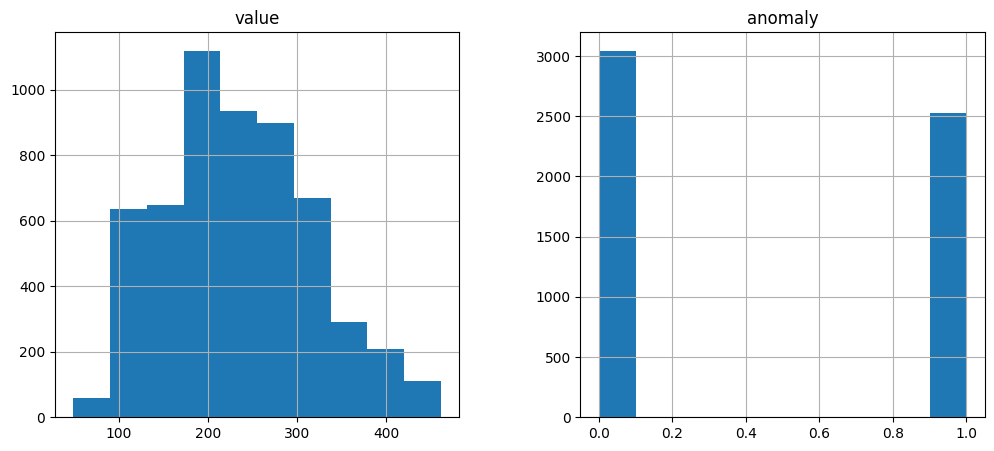

In [1124]:
df.hist(figsize = (12,5))

<Axes: xlabel='agency', ylabel='value'>

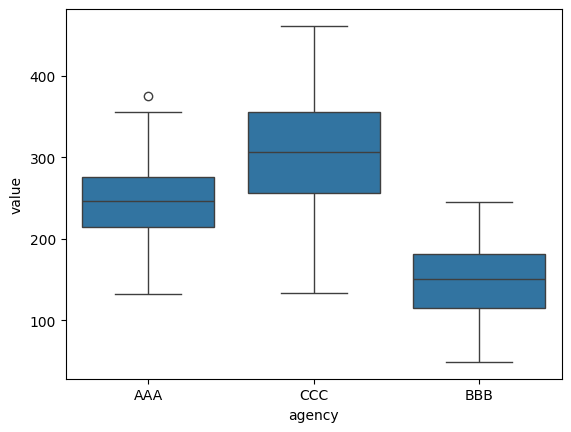

In [1125]:
sns.boxplot(x='agency', y='value', data=df)

In [1126]:
df['date'] = pd.to_datetime(df['date'])

In [1127]:
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['dayofyear'] = df['date'].dt.day
df['halfyear'] = np.where(df['month'] < 7, 1, 2)

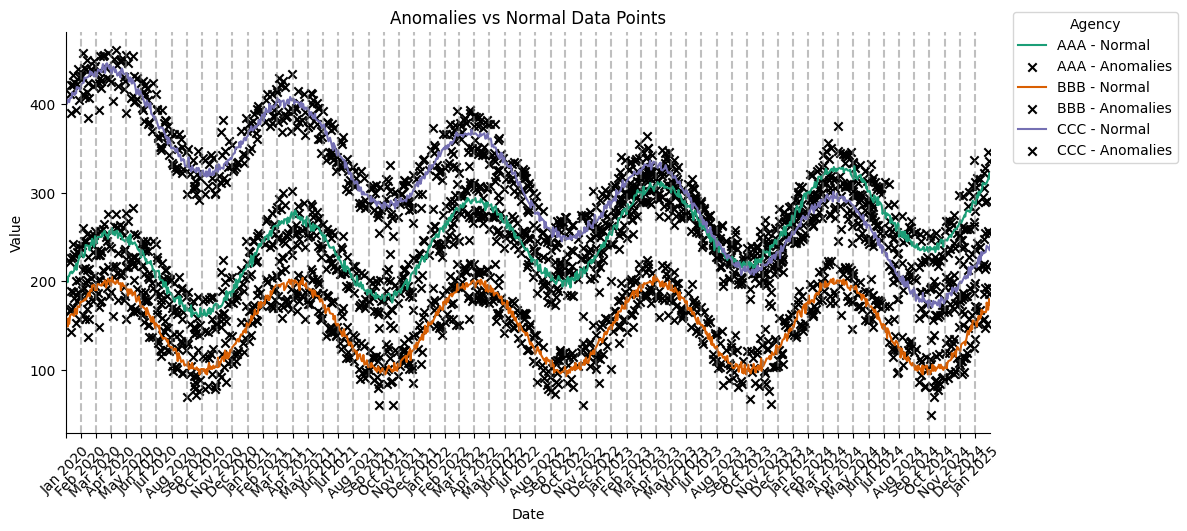

In [1128]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))

    normal_points = series[series['anomaly'] == 0]
    anomaly_points = series[series['anomaly'] == 1]
    plt.plot(normal_points['date'], normal_points['value'], label=f"{series_name} - Normal", color=palette[series_index % len(palette)])
    plt.scatter(anomaly_points['date'], anomaly_points['value'], color='black', label=f"{series_name} - Anomalies", marker='x')

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)

for i, (series_name, series) in enumerate(df_sorted.groupby('agency')):
    _plot_series(series, series_name, i)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.set_xlim(df_sorted['date'].min(), df_sorted['date'].max())

for month_start in df_sorted['date'].dt.to_period('M').unique():
    month_start_date = month_start.start_time
    plt.axvline(x=month_start_date, color='gray', linestyle='--', alpha=0.5)

fig.legend(title='Agency', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Anomalies vs Normal Data Points')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='date', ylabel='value'>

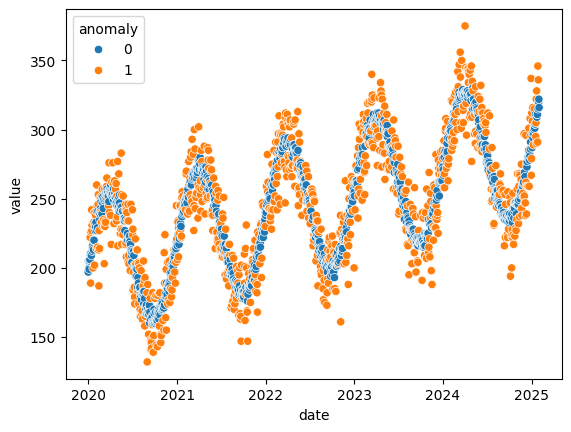

In [1129]:
sns.scatterplot(data=df.query("agency=='AAA'"), x='date', y='value', hue='anomaly')

<Axes: xlabel='date', ylabel='value'>

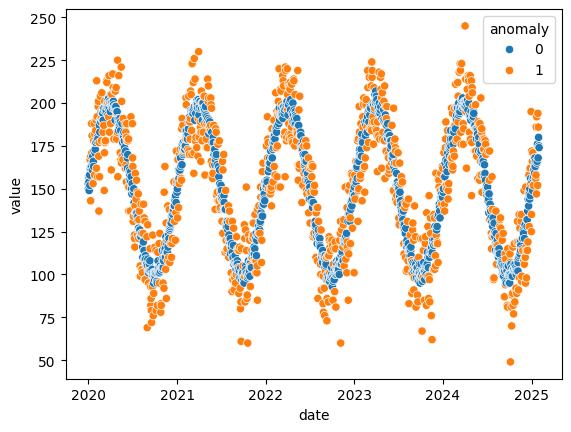

In [1130]:
sns.scatterplot(data=df.query("agency=='BBB'"), x='date', y='value', hue='anomaly')

<Axes: xlabel='date', ylabel='value'>

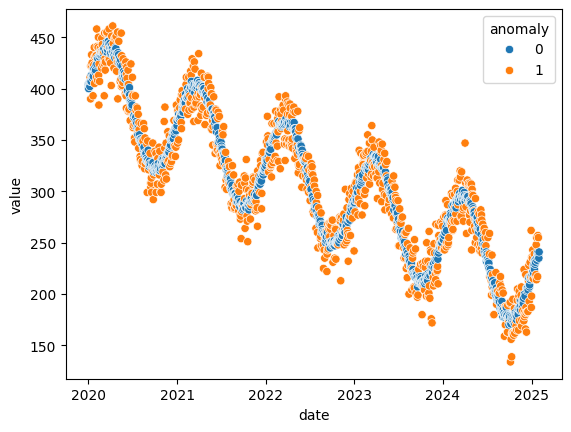

In [1131]:
sns.scatterplot(data=df.query("agency=='CCC'"), x='date', y='value', hue='anomaly')

In [1132]:
data = df.sort_values(by= ['agency', 'date']).reset_index(drop = True)

In [1133]:
data.head()

,date,value,agency,anomaly,year,day_of_week,month,quarter,dayofyear,halfyear
0,2020-01-01,197,AAA,0,2020,2,1,1,1,1
1,2020-01-02,205,AAA,0,2020,3,1,1,2,1
2,2020-01-03,205,AAA,0,2020,4,1,1,3,1
3,2020-01-04,200,AAA,0,2020,5,1,1,4,1
4,2020-01-05,199,AAA,0,2020,6,1,1,5,1


Test-Train split

In [1134]:
train_df, test_df = train_test_split(data, test_size=0.2, stratify=df[['anomaly','agency']], random_state=42)

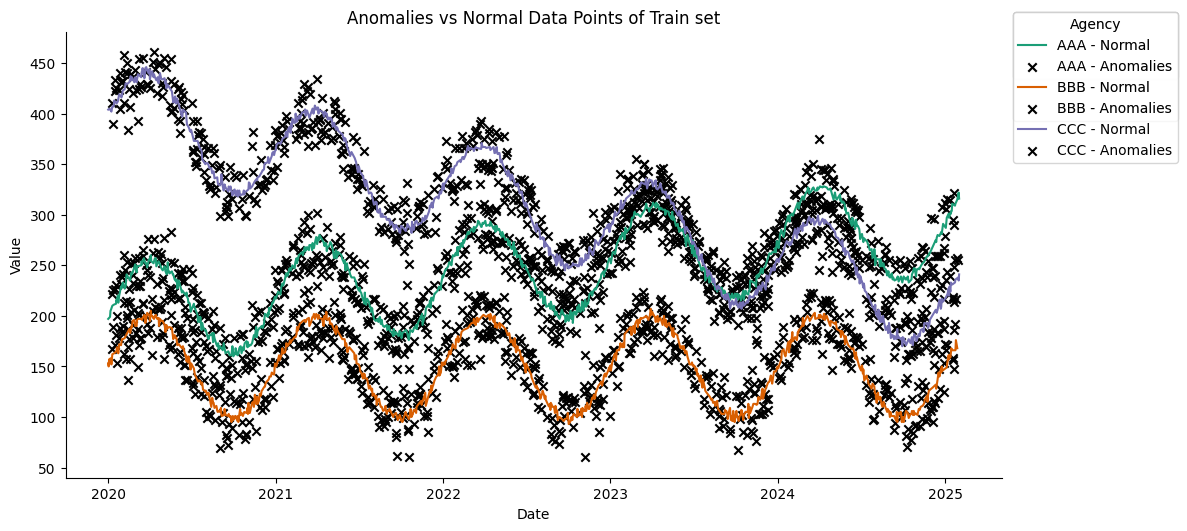

In [1135]:
import matplotlib.pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))

    normal_points = series[series['anomaly'] == 0]
    anomaly_points = series[series['anomaly'] == 1]
    plt.plot(normal_points['date'], normal_points['value'], label=f"{series_name} - Normal", color=palette[series_index % len(palette)])
    plt.scatter(anomaly_points['date'], anomaly_points['value'], color='black', label=f"{series_name} - Anomalies", marker='x')

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
train_df_sorted = train_df.sort_values('date', ascending=True)

for i, (series_name, series) in enumerate(train_df_sorted.groupby('agency')):
    _plot_series(series, series_name, i)
    fig.legend(title='Agency', bbox_to_anchor=(1, 1), loc='upper left')

sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Anomalies vs Normal Data Points of Train set')
plt.show()

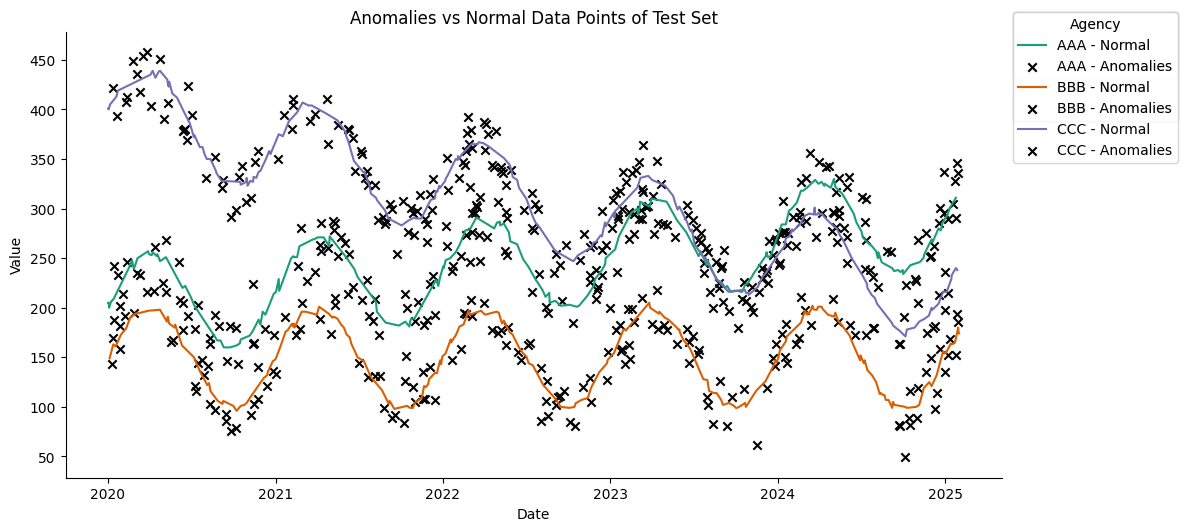

In [1136]:
import matplotlib.pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))

    normal_points = series[series['anomaly'] == 0]
    anomaly_points = series[series['anomaly'] == 1]
    plt.plot(normal_points['date'], normal_points['value'], label=f"{series_name} - Normal", color=palette[series_index % len(palette)])
    plt.scatter(anomaly_points['date'], anomaly_points['value'], color='black', label=f"{series_name} - Anomalies", marker='x')

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
train_df_sorted = test_df.sort_values('date', ascending=True)

for i, (series_name, series) in enumerate(train_df_sorted.groupby('agency')):
    _plot_series(series, series_name, i)
    fig.legend(title='Agency', bbox_to_anchor=(1, 1), loc='upper left')

sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Anomalies vs Normal Data Points of Test Set')
plt.show()


Feature Selection

-7-Day Rolling Mean: Calculates the average value over a 7-day window to smooth
 fluctuations and identify trends.

-Lag Features: Captures the previous day’s value (lag_1) and day-of-year
 (day_lag) to analyze changes over time.

-Difference from Rolling Mean: Measures deviations between the actual value and
 its rolling mean to detect anomalies.

-Exponential Moving Averages (EMA): Computes weighted averages over 3, 5
 days to emphasize recent data trends.

-Slope Calculation: Determines the rate of change between consecutive days to
 capture sharp increases or decreases.

-Handling Edge Cases: Adjusts slope values to avoid division by zero or invalid
 results like infinity (inf) or NaN.

-3-Point Rolling Slope: Smooths slope values using a rolling average over a    
 3-day window for more stable anomaly detection.













In [1137]:
train_df = train_df.sort_values(by=['agency', 'date'])

train_df['rolling_mean'] = train_df.groupby('agency')['value'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

train_df['lag_1'] = train_df.groupby('agency')['value'].shift(1)
train_df['day_lag'] = train_df.groupby('agency')['dayofyear'].shift(1)

train_df = train_df.fillna(0)

train_df['diff'] = train_df['rolling_mean'] - train_df['value']

train_df['ema_3'] = train_df.groupby('agency')['value'].transform(lambda x: x.ewm(span=3, adjust=False).mean())
train_df['ema_5'] = train_df.groupby('agency')['value'].transform(lambda x: x.ewm(span=5, adjust=False).mean())

train_df['percent_change'] = train_df.groupby('agency')['value'].pct_change().fillna(0)

train_df['slope'] = (train_df['value'] - train_df['lag_1']) / (train_df['dayofyear'] - train_df['day_lag'])

train_df['slope'] = np.where((train_df['dayofyear'] - train_df['day_lag']) == 0, 0, train_df['slope'])
train_df['slope'] = train_df['slope'].replace([np.inf, -np.inf], np.nan).fillna(0)
train_df.loc[train_df.index[0], 'slope'] = 0

train_df['rolling_slope'] = (
    train_df.groupby('agency')['slope']
    .rolling(window=3, min_periods=1)
    .mean()
    .droplevel(0)
)

train_df.head(15)


,date,value,agency,anomaly,year,day_of_week,month,quarter,dayofyear,halfyear,rolling_mean,lag_1,day_lag,diff,ema_3,ema_5,percent_change,slope,rolling_slope
0,2020-01-01,197,AAA,0,2020,2,1,1,1,1,197.000000,0.0,0.0,0.000000,197.000000,197.000000,0.000000,0.000000,0.000000
4,2020-01-05,199,AAA,0,2020,6,1,1,5,1,198.000000,197.0,1.0,-1.000000,198.000000,197.666667,0.010152,0.500000,0.250000
5,2020-01-06,205,AAA,0,2020,0,1,1,6,1,200.333333,199.0,5.0,-4.666667,201.500000,200.111111,0.030151,6.000000,2.166667
6,2020-01-07,206,AAA,0,2020,1,1,1,7,1,201.750000,205.0,6.0,-4.250000,203.750000,202.074074,0.004878,1.000000,2.500000
8,2020-01-09,222,AAA,1,2020,3,1,1,9,1,205.800000,206.0,7.0,-16.200000,212.875000,208.716049,0.077670,8.000000,5.000000
9,2020-01-10,210,AAA,0,2020,4,1,1,10,1,206.500000,222.0,9.0,-3.500000,211.437500,209.144033,-0.054054,-12.000000,-1.000000
10,2020-01-11,189,AAA,1,2020,5,1,1,11,1,204.000000,210.0,10.0,15.000000,200.218750,202.429355,-0.100000,-21.000000,-8.333333
11,2020-01-12,226,AAA,1,2020,6,1,1,12,1,208.142857,189.0,11.0,-17.857143,213.109375,210.286237,0.195767,37.000000,1.333333
12,2020-01-13,211,AAA,0,2020,0,1,1,13,1,209.857143,226.0,12.0,-1.142857,212.054688,210.524158,-0.066372,-15.000000,0.333333
15,2020-01-16,227,AAA,1,2020,3,1,1,16,1,213.000000,211.0,13.0,-14.000000,219.527344,216.016105,0.075829,5.333333,9.111111


In [1138]:
test_df = test_df.sort_values(by=['agency', 'date'])

def calc_rolling_mean(group):
    return group['value'].rolling(window=7, min_periods=1).mean()

test_df['rolling_mean'] = test_df.groupby('agency', group_keys=False).apply(calc_rolling_mean)

test_df['diff'] = test_df['rolling_mean'] - test_df['value']

test_df['day_lag'] = test_df.groupby('agency')['dayofyear'].shift(1)
test_df['lag_1'] = test_df.groupby('agency')['value'].shift(1)

test_df = test_df.fillna(0)

test_df['ema_3'] = test_df.groupby('agency')['value'].transform(lambda x: x.ewm(span=3, adjust=False).mean())
test_df['ema_5'] = test_df.groupby('agency')['value'].transform(lambda x: x.ewm(span=5, adjust=False).mean())

test_df['percent_change'] = test_df.groupby('agency')['value'].pct_change().fillna(0)
test_df['slope'] = (test_df['value'] - test_df['lag_1']) / (test_df['dayofyear'] - test_df['day_lag'])

test_df['slope'] = np.where((test_df['dayofyear'] - test_df['day_lag']) == 0, 0, test_df['slope'])
test_df['slope'] = test_df['slope'].replace([np.inf, -np.inf], np.nan).fillna(0)
test_df.loc[test_df.index[0], 'slope'] = 0

test_df['rolling_slope'] = (
    test_df.groupby('agency')['slope']
    .rolling(window=3, min_periods=1)
    .mean()
    .droplevel(0)
)

test_df['slope'] = test_df.groupby('agency')['slope'].transform(lambda x: x.fillna(0))
test_df['rolling_slope'] = test_df.groupby('agency')['rolling_slope'].transform(lambda x: x.fillna(0))

test_df.head(5)


<ipython-input-1138-dfc6540db096>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df['rolling_mean'] = test_df.groupby('agency', group_keys=False).apply(calc_rolling_mean)


,date,value,agency,anomaly,year,day_of_week,month,quarter,dayofyear,halfyear,rolling_mean,diff,day_lag,lag_1,ema_3,ema_5,percent_change,slope,rolling_slope
1,2020-01-02,205,AAA,0,2020,3,1,1,2,1,205.000000,0.000000,0.0,0.0,205.000,205.000000,0.000000,0.0,0.000000
2,2020-01-03,205,AAA,0,2020,4,1,1,3,1,205.000000,0.000000,2.0,205.0,205.000,205.000000,0.000000,0.0,0.000000
3,2020-01-04,200,AAA,0,2020,5,1,1,4,1,203.333333,3.333333,3.0,205.0,202.500,203.333333,-0.024390,-5.0,-1.666667
7,2020-01-08,206,AAA,0,2020,2,1,1,8,1,204.000000,-2.000000,4.0,200.0,204.250,204.222222,0.030000,1.5,-1.166667
13,2020-01-14,209,AAA,0,2020,1,1,1,14,1,205.000000,-4.000000,8.0,206.0,206.625,205.814815,0.014563,0.5,-1.000000


In [1139]:
X_train = train_df.drop(columns=['anomaly','date'])
y_train = train_df['anomaly']

In [1140]:
X_test = test_df.drop(columns=['anomaly','date'])
y_test = test_df['anomaly']

In [1141]:
print("Train set anomaly percentage:", train_df['anomaly'].mean())
print("Test set anomaly percentage:", test_df['anomaly'].mean())

Train set anomaly percentage: 0.4521193092621664
Test set anomaly percentage: 0.4600896860986547


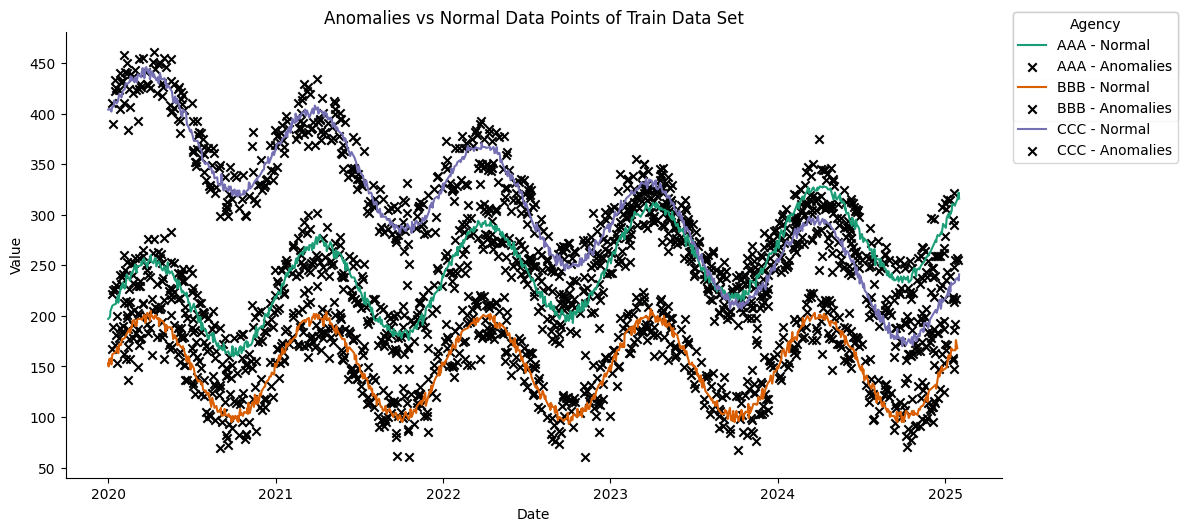

In [1142]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))

    normal_points = series[series['anomaly'] == 0]
    anomaly_points = series[series['anomaly'] == 1]
    plt.plot(normal_points['date'], normal_points['value'], label=f"{series_name} - Normal",  color=palette[series_index % len(palette)])
    plt.scatter(anomaly_points['date'], anomaly_points['value'], color='black', label=f"{series_name} - Anomalies", marker='x')

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
train_df_sorted = train_df.sort_values('date', ascending=True)

for i, (series_name, series) in enumerate(train_df_sorted.groupby('agency')):
    _plot_series(series, series_name, i)
    fig.legend(title='Agency', bbox_to_anchor=(1, 1), loc='upper left')

sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Anomalies vs Normal Data Points of Train Data Set')
plt.show()

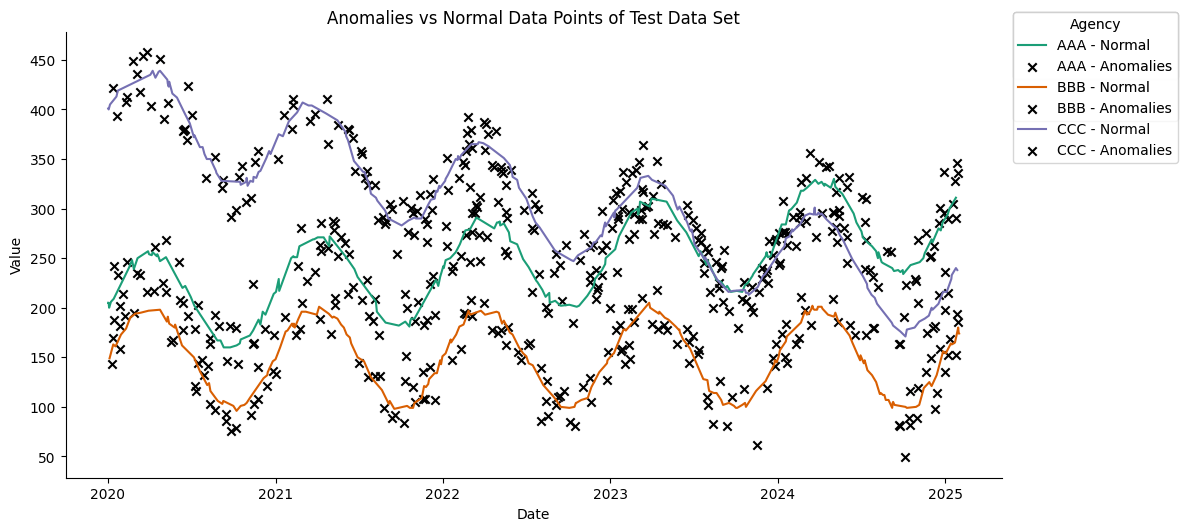

In [1143]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))

    normal_points = series[series['anomaly'] == 0]
    anomaly_points = series[series['anomaly'] == 1]
    plt.plot(normal_points['date'], normal_points['value'], label=f"{series_name} - Normal", color=palette[series_index % len(palette)])
    plt.scatter(anomaly_points['date'], anomaly_points['value'], color='black', label=f"{series_name} - Anomalies", marker='x')

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
train_df_sorted = test_df.sort_values('date', ascending=True)

for i, (series_name, series) in enumerate(train_df_sorted.groupby('agency')):
    _plot_series(series, series_name, i)
    fig.legend(title='Agency', bbox_to_anchor=(1, 1), loc='upper left')

sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Anomalies vs Normal Data Points of Test Data Set')
plt.show()

In [1144]:
X_train.columns

Index(['value', 'agency', 'year', 'day_of_week', 'month', 'quarter',
       'dayofyear', 'halfyear', 'rolling_mean', 'lag_1', 'day_lag', 'diff',
       'ema_3', 'ema_5', 'percent_change', 'slope', 'rolling_slope'],
      dtype='object')

In [1145]:
numerical_features = ['value', 'year', 'month', 'quarter','halfyear', 'rolling_mean', 'lag_1','diff',
       'slope', 'rolling_slope', 'ema_3', 'ema_5','percent_change']
categorical_features = ['agency']
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['value', 'year', 'month', 'quarter', 'halfyear', 'rolling_mean', 'lag_1', 'diff', 'slope', 'rolling_slope', 'ema_3', 'ema_5', 'percent_change']
Categorical Features: ['agency']


In [1146]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop = 'first', handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

Logistic Regression

In [1147]:
lpipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=124))
])

lpipeline.fit(X_train, y_train)

y_train_pred = lpipeline.predict(X_train)
y_test_p = lpipeline.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_p)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5918367346938775
Test Accuracy: 0.5452914798206278


In [1148]:
from sklearn.metrics import classification_report

y_test_pred = lpipeline.predict(X_test)
print(classification_report(y_test, y_test_p))

              precision    recall  f1-score   support

           0       0.55      0.91      0.68       602
           1       0.53      0.12      0.19       513

    accuracy                           0.55      1115
   macro avg       0.54      0.51      0.44      1115
weighted avg       0.54      0.55      0.46      1115



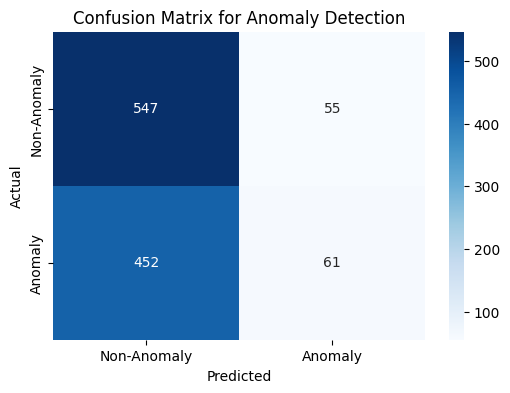

In [1149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_test_p)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Anomaly', 'Anomaly'], yticklabels=['Non-Anomaly', 'Anomaly'])
plt.title('Confusion Matrix for Anomaly Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


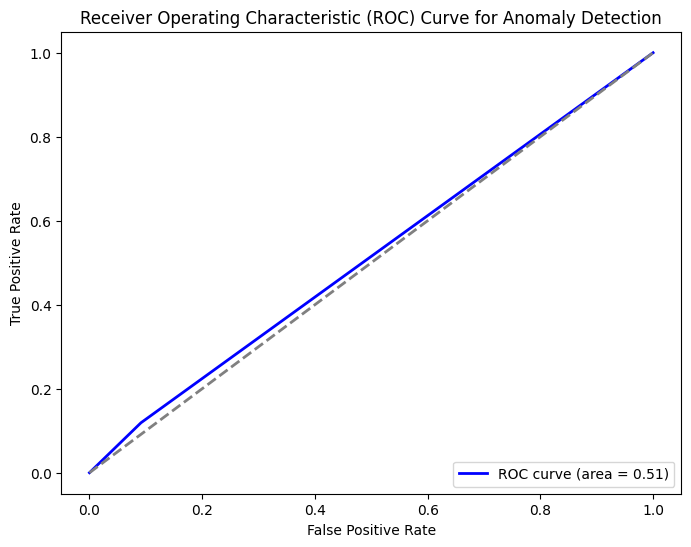

In [1150]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Anomaly Detection')
plt.legend(loc='lower right')
plt.show()

Decision Trees

In [1151]:
dpipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth= 5, criterion='gini', random_state=42))
])

print(dpipeline)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['value', 'year', 'month',
                                                   'quarter', 'halfyear',
                                                   'rolling_mean', 'lag_1',
                                                   'diff', 'slope',
                                                   'rolling_slope', 'ema_3',
                                                   'ema_5', 'percent_change']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                

In [1152]:
dpipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['value', 'year', 'month',
                                                   'quarter', 'halfyear',
                                                   'rolling_mean', 'lag_1',
                                                   'diff', 'slope',
                                                   'rolling_slope', 'ema_3',
                                                   'ema_5', 'percent_change']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['agency'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [1153]:
train_score = dpipeline.score(X_train, y_train)
test_score = dpipeline.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

Training Score: 0.836510428347163
Test Score: 0.6547085201793722


In [1154]:
from sklearn.metrics import classification_report

y_test_pred = dpipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       602
           1       0.61      0.69      0.65       513

    accuracy                           0.65      1115
   macro avg       0.66      0.66      0.65      1115
weighted avg       0.66      0.65      0.66      1115



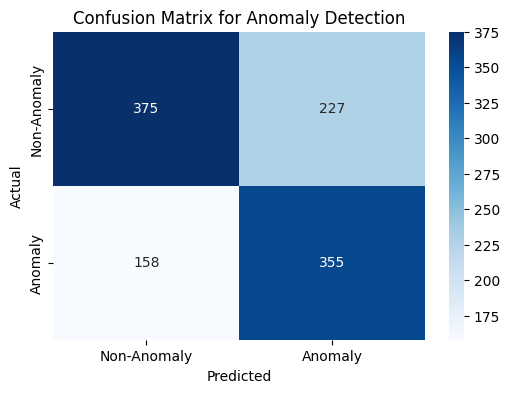

In [1155]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Anomaly', 'Anomaly'], yticklabels=['Non-Anomaly', 'Anomaly'])
plt.title('Confusion Matrix for Anomaly Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

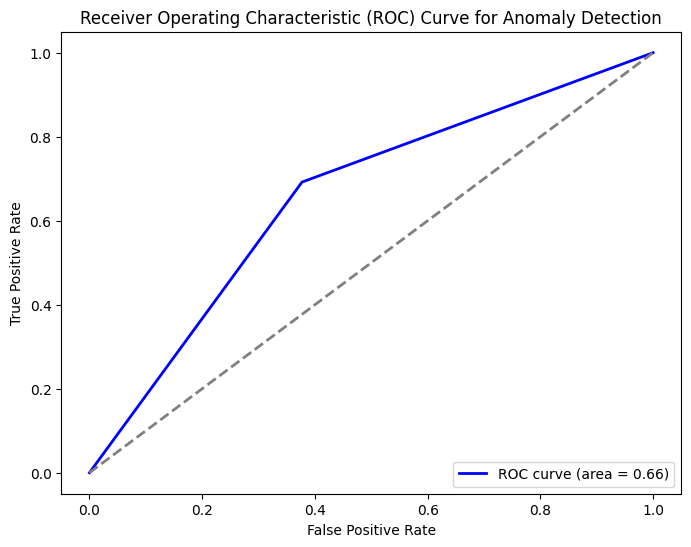

In [1156]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Anomaly Detection')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier

In [1157]:
X_traindf = pd.get_dummies(X_train, columns=['agency'], prefix='agency')

In [1163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rpipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_param_grid = [{
    'classifier__max_depth': [5, 8, 10, 12, 15],
    'classifier__n_estimators': [10, 50, 100],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample'],
    'classifier__max_samples': [1000, 2000, 3000]
}]

rf_results = GridSearchCV(estimator=rpipeline, param_grid=rf_param_grid, scoring='f1', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

print(rf_results.best_estimator_)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['value', 'year', 'month',
                                                   'quarter', 'halfyear',
                                                   'rolling_mean', 'lag_1',
                                                   'diff', 'slope',
                                                   'rolling_slope', 'ema_3',
                                                   'ema_5', 'percent_change']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                

In [1164]:
rpipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['value', 'year', 'month',
                                                   'quarter', 'halfyear',
                                                   'rolling_mean', 'lag_1',
                                                   'diff', 'slope',
                                                   'rolling_slope', 'ema_3',
                                                   'ema_5', 'percent_change']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['agency'])])),
                ('classifier', RandomForestClassifier())])

In [1165]:
y_testp_rf = rf_results.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp_rf))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       602
           1       0.61      0.67      0.64       513

    accuracy                           0.65      1115
   macro avg       0.65      0.65      0.65      1115
weighted avg       0.66      0.65      0.65      1115



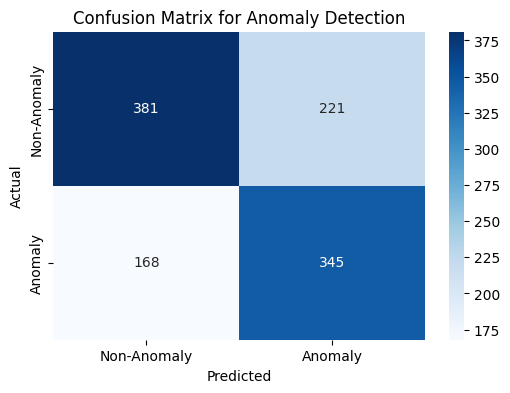

In [1166]:
conf_matrix = confusion_matrix(y_test, y_testp_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Anomaly', 'Anomaly'], yticklabels=['Non-Anomaly', 'Anomaly'])
plt.title('Confusion Matrix for Anomaly Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

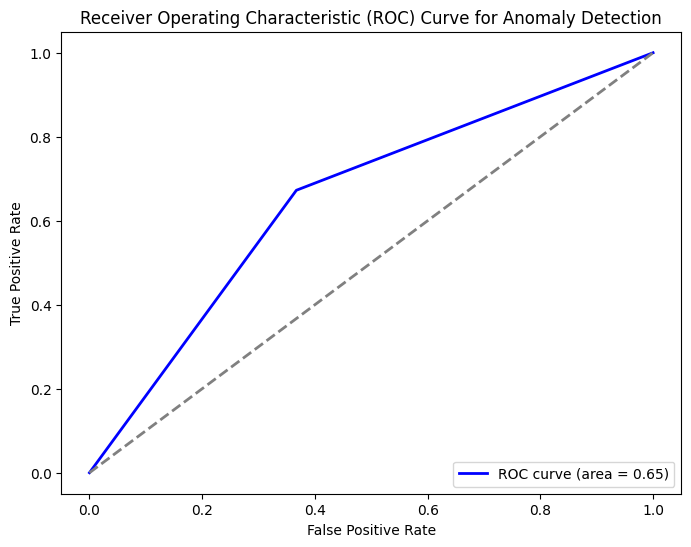

In [1167]:
fpr, tpr, thresholds = roc_curve(y_test, y_testp_rf)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Anomaly Detection')
plt.legend(loc='lower right')
plt.show()
